# Processing Female Population



## Reading data input

Reading ouput of the data generate by ProcessingCensus2016.ipynb and creating a dataFrame **df**.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
df = pd.read_csv('data/CensusLocalAreaProfiles2016_cleaned.csv', encoding='ISO-8859-1')


---

## Selecting data of interest and creating a new dataFrame **df1** (female population)

Selecting rows 55 to 59 and columns 0 to 24 (female population between 5 years old and 19 years old data set) by calling iloc function in the data frame created. 

In [24]:
df1 = df.iloc[55:59, 0:24]

---

## Checking the dimensions of the new dataFrame **df1**

In [25]:
df1.shape

(4, 24)

**df1** has 24 rows and 26 columns.

---

## Checking the apperance of the new dataFrame created

In [26]:
df1.head(26)

,ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
55,56,5 to 9 years,340,530,580,350,495,780,1150,315,...,230,1035,570,210,170,190,860,565,275,330
56,57,10 to 14 years,400,390,810,295,400,745,1060,410,...,275,1015,515,250,175,175,910,650,200,410
57,58,15 to 64 years,5350,23805,7425,13710,11550,12125,18130,5080,...,4625,18955,8330,2930,2830,3835,12970,10975,17960,4600
58,59,15 to 19 years,580,580,870,355,400,890,1290,520,...,420,1355,525,285,190,175,1270,940,325,450


The row with **Variable** "15 to 64 years" shows information repeated. This row should be deleted.

---

## Creating a new dataFrame **df2** without rows and columns not needed.

Deleting row with **Variable** "15 to 64 years" and column ID.

In [27]:
df2 = df1.drop(index=57, columns='ID')

In [28]:
df2.head()

,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
55,5 to 9 years,340,530,580,350,495,780,1150,315,660,...,230,1035,570,210,170,190,860,565,275,330
56,10 to 14 years,400,390,810,295,400,745,1060,410,715,...,275,1015,515,250,175,175,910,650,200,410
58,15 to 19 years,580,580,870,355,400,890,1290,520,865,...,420,1355,525,285,190,175,1270,940,325,450


---

## Resetting index of rows  

The new index gives again a sequential number in each row.  

In [29]:
df2.reset_index(drop=True)

,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
0,5 to 9 years,340,530,580,350,495,780,1150,315,660,...,230,1035,570,210,170,190,860,565,275,330
1,10 to 14 years,400,390,810,295,400,745,1060,410,715,...,275,1015,515,250,175,175,910,650,200,410
2,15 to 19 years,580,580,870,355,400,890,1290,520,865,...,420,1355,525,285,190,175,1270,940,325,450


---

## Data set visual QC,to detect errors, missing values, anomalies,etc

Plotting datasets requering numeric datatypes.

### Checking variable data types of **df2**

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 55 to 58
Data columns (total 23 columns):
Variable                    3 non-null object
Arbutus-Ridge               3 non-null object
Downtown                    3 non-null object
Dunbar-Southlands           3 non-null object
Fairview                    3 non-null object
Grandview-Woodland          3 non-null object
Hastings-Sunrise            3 non-null object
Kensington-Cedar Cottage    3 non-null object
Kerrisdale                  3 non-null object
Killarney                   3 non-null object
Kitsilano                   3 non-null object
Marpole                     3 non-null object
Mount Pleasant              3 non-null object
Oakridge                    3 non-null object
Renfrew-Collingwood         3 non-null object
Riley Park                  3 non-null object
Shaughnessy                 3 non-null object
South Cambie                3 non-null object
Strathcona                  3 non-null object
Sunset                 

To plot the dataset, numeric values should change data type from object to numeric with the following expression in each column:

**df["column name"] = pd.to_numeric(df["column name"])**

It could be repetitive and tedius if copy and paste manually each column name.Let's automatize this process:

### changing data types

**First step:** Identifying the columns

In [31]:
df2.columns

Index(['Variable', 'Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands',
       'Fairview', 'Grandview-Woodland', 'Hastings-Sunrise',
       'Kensington-Cedar Cottage', 'Kerrisdale', 'Killarney', 'Kitsilano',
       'Marpole', 'Mount Pleasant', 'Oakridge', 'Renfrew-Collingwood',
       'Riley Park', 'Shaughnessy', 'South Cambie', 'Strathcona', 'Sunset',
       'Victoria-Fraserview', 'West End', 'West Point Grey'],
      dtype='object')

**Second step:** Creating a column and a new dataFrame(df3) with all index of df2.

In [32]:
df3 = pd.DataFrame({'zones':['Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands',
       'Fairview', 'Grandview-Woodland', 'Hastings-Sunrise',
       'Kensington-Cedar Cottage', 'Kerrisdale', 'Killarney', 'Kitsilano',
       'Marpole', 'Mount Pleasant', 'Oakridge', 'Renfrew-Collingwood',
       'Riley Park', 'Shaughnessy', 'South Cambie', 'Strathcona', 'Sunset',
       'Victoria-Fraserview', 'West End', 'West Point Grey']}) 

In [33]:
df3.head()

,zones
0,Arbutus-Ridge
1,Downtown
2,Dunbar-Southlands
3,Fairview
4,Grandview-Woodland


**Third step:** With a for loop, let's change the datatype to numeric for each zone.

In [34]:
for index, row in df3.iterrows():
    df2[row["zones"]] = pd.to_numeric(df2[row["zones"]])

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 55 to 58
Data columns (total 23 columns):
Variable                    3 non-null object
Arbutus-Ridge               3 non-null int64
Downtown                    3 non-null int64
Dunbar-Southlands           3 non-null int64
Fairview                    3 non-null int64
Grandview-Woodland          3 non-null int64
Hastings-Sunrise            3 non-null int64
Kensington-Cedar Cottage    3 non-null int64
Kerrisdale                  3 non-null int64
Killarney                   3 non-null int64
Kitsilano                   3 non-null int64
Marpole                     3 non-null int64
Mount Pleasant              3 non-null int64
Oakridge                    3 non-null int64
Renfrew-Collingwood         3 non-null int64
Riley Park                  3 non-null int64
Shaughnessy                 3 non-null int64
South Cambie                3 non-null int64
Strathcona                  3 non-null int64
Sunset                      3 non-null in

Now, all columns in the dataFrame df2(Exept the column **Variable**) have numeric dataType

### Plotting 

The following expression it will be used to plot each range of female population in each planning zone. 

**df2.plot(kind='bar',x='Variable',y='zones',color='green')
plt.show()**

With a for loop, let's plot in bar graphs of the female population data. 

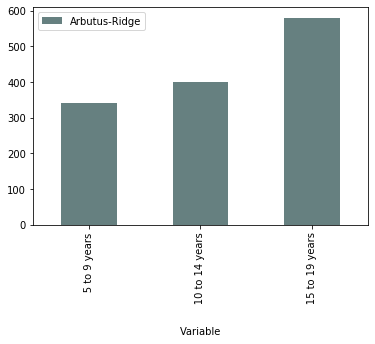

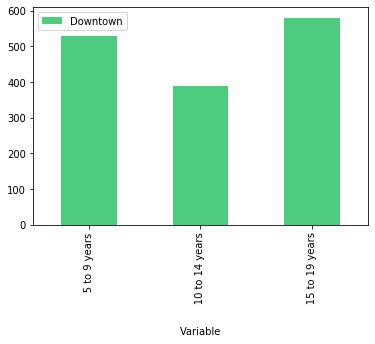

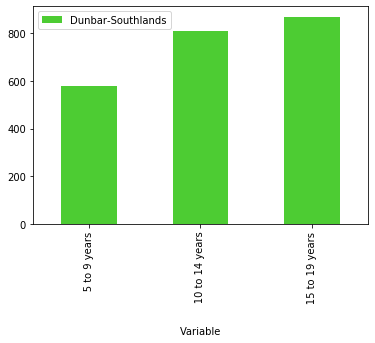

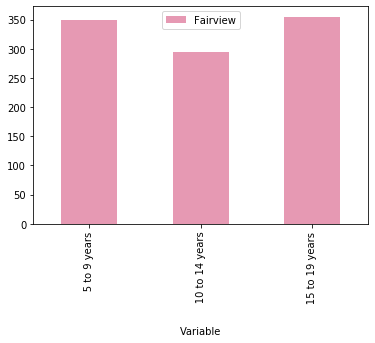

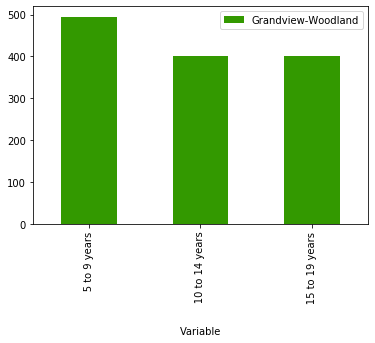

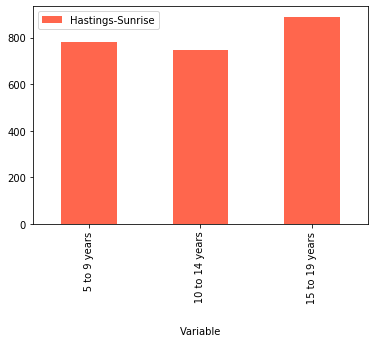

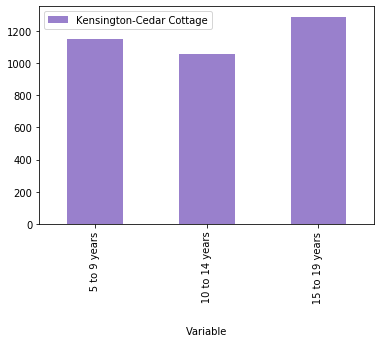

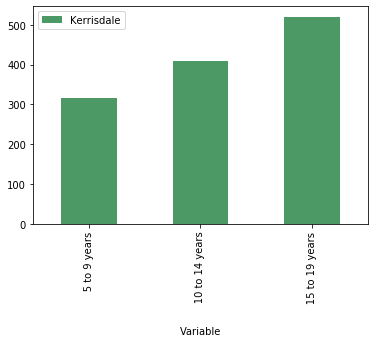

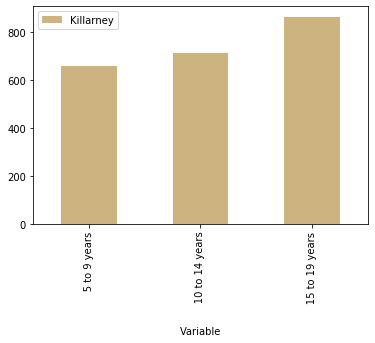

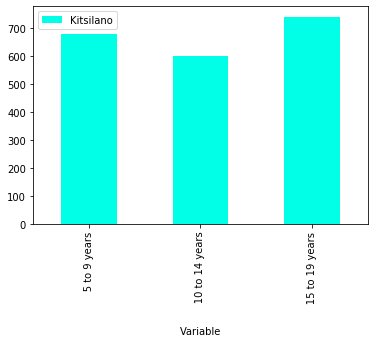

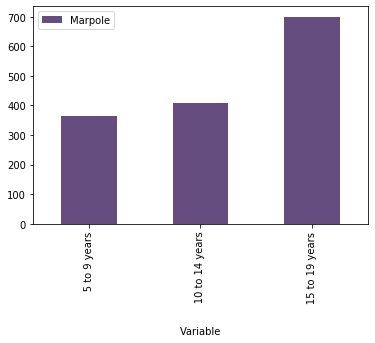

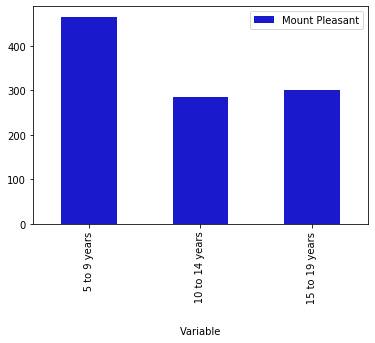

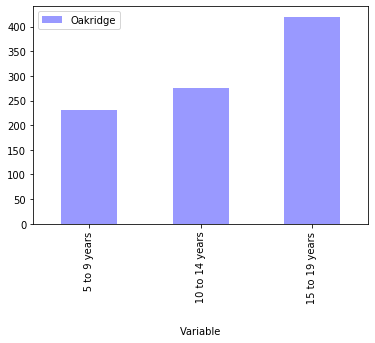

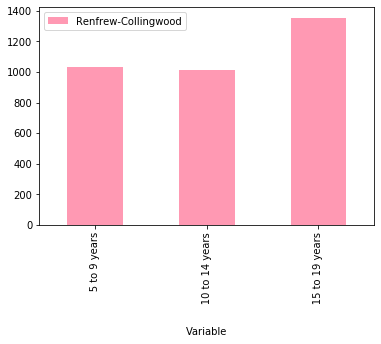

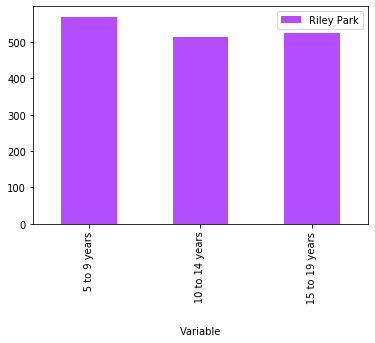

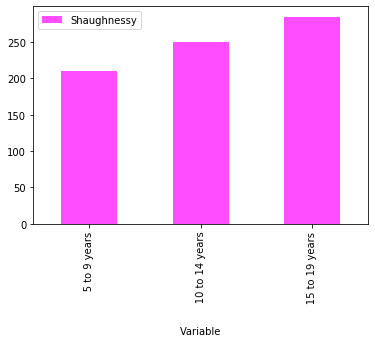

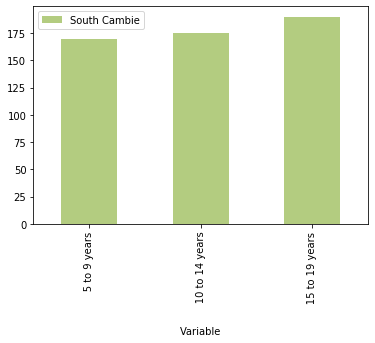

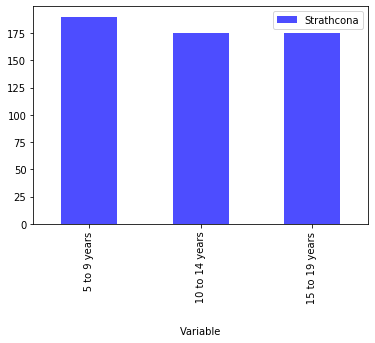

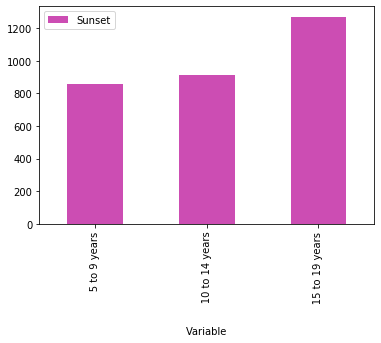

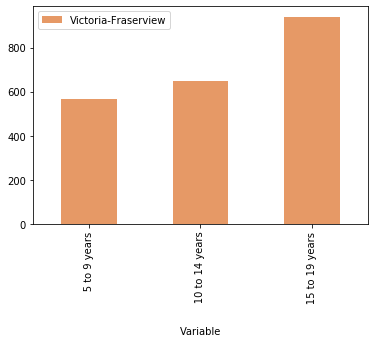

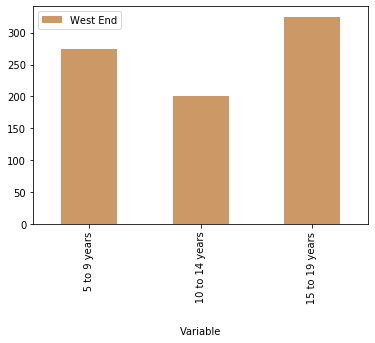

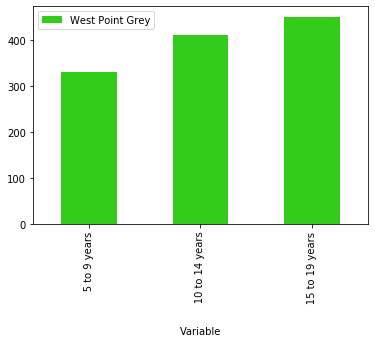

In [36]:
for index, row in df3.iterrows():
    df2.plot(kind='bar',x='Variable',y=row["zones"],color=(round(random.uniform(0,1),1),round(random.uniform(0,1),1),round(random.uniform(0,1),1)))
    plt.show()

After analyzing each bar graph, I didn't see any discrepancy or possible error.

---

## Data conditioning to be included in a shapefile

To visualize the female population in the final map, this dataFrame df2 will be included in a shapefile.

**First step:** Transpose dataframe df2

In [37]:
df2.columns

Index(['Variable', 'Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands',
       'Fairview', 'Grandview-Woodland', 'Hastings-Sunrise',
       'Kensington-Cedar Cottage', 'Kerrisdale', 'Killarney', 'Kitsilano',
       'Marpole', 'Mount Pleasant', 'Oakridge', 'Renfrew-Collingwood',
       'Riley Park', 'Shaughnessy', 'South Cambie', 'Strathcona', 'Sunset',
       'Victoria-Fraserview', 'West End', 'West Point Grey'],
      dtype='object')

In [38]:
df2_transpose = df2.T

**Second step:** Reset index.

In [39]:
new_index = ['Sunset', 'Mount Pleasant', 'Riley Park', 'Downtown','Kitsilano', 'Dunbar-Southlands', 'Kerrisdale', 'Arbutus-Ridge', 
             'West Point Grey', 'Marpole', 'Oakridge', 'Shaughnessy', 'Fairview', 'South Cambie', 'West End', 'Killarney', 'Renfrew-Collingwood',
             'Hastings-Sunrise', 'Victoria-Fraserview', 'Kensington-Cedar Cottage', 'Strathcona', 'Grandview-Woodland'
             ]

In [40]:
df4 = df2_transpose.reindex(new_index)

**Third step:** Rename columns name.

In [41]:
df5 = df4.rename(columns={55: "5 to 9 years", 56 : "10 to 14 years", 58 : "15 to 19 years"})

## Writing data (output)

In [42]:
df5.to_csv('data/FemalePopulationDataset_cleaned.csv')